In [1]:
# Importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [22]:
# Exploring the data
df = pd.read_csv(r'C:\Users\bakwe\Desktop\BSE\Econometrics/Assig1.csv')
df.head()

,lwklywge,educ
0,5.790019,12
1,5.952494,11
2,5.315949,12
3,5.595926,12
4,6.068915,12


(a) Using a density histogram or kernel density estimation (your choice) summarize the behavior of variable weekly pay (wage) included in the sample. Find the sample mean, sample median, and coefficient of skewness for wage. Given your graph, are the values of the sample mean and sample median as expected? And the coefficient of skewness? Comment.

In [23]:
# Calculating exponential for the ln(wage), which will equal to wage in USD
df['wage'] = df['lwklywge'].apply(lambda x: np.exp(x))
df.head()

,lwklywge,educ,wage
0,5.790019,12,327.019238
1,5.952494,11,384.711653
2,5.315949,12,203.557598
3,5.595926,12,269.326878
4,6.068915,12,432.211434


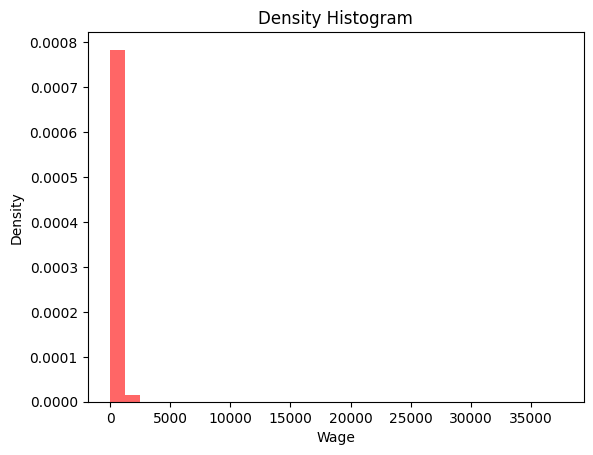

In [24]:
# Plotting the density histogram for the wage
fig, ax = plt.subplots()
ax.hist(df['wage'], bins=30, density=True, alpha=0.6, color='r')
ax.set_title('Density Histogram')
ax.set_xlabel('Wage')
ax.set_ylabel('Density')

plt.show()

In [25]:
# Calculating the measures of center and printing the result
print("Mean wage:", df['wage'].mean(), "Median wage:", df['wage'].median(), "Skewness coefficient:", df['wage'].skew())

Mean wage: 439.47087950205497 Median wage: 384.7116528324841 Skewness coefficient: 26.39013344726104


The distribution of wages is positively skewed (or right-skewed), as evident in the graph: most values cluster around the left tail of the distribution, while the right tail of the distribution is longer. In the case of a positively skewed distribution, the mean is greater than the median. Our calculations confirm this result: the coefficient of skewness is positive, equaling 26.39. The sample mean is greater than the sample median, with values of 439 USD and 385 USD, respectively. However, we also understand that in the case of ln(wage), the distribution is expected to be more symmetric. We will verify this in the next exercise.

(d) Reproduce the part of Figure 3.1.1 that includes the conditional sample means (black dots) and the thick black function joining them. (Please notice you are only asked to reproduce the filled circles and the thick black line joining them, not the 4 Kernel density estimates of the conditional distributions included in the plot). Since the data file provided is slightly different than the one used by the authors, you will not get exactly the same values as those included in Figure 3.1.1, but close enough. Include plot and code file as your answer.

In [26]:
# Grouping by 'educ' and calculating the mean ln(wage) for each group
conditional = df.groupby('educ')['lwklywge'].mean().reset_index()
conditional.columns = ['educ', 'avg_ln_wage']
conditional.head()

,educ,avg_ln_wage
0,0,5.022035
1,1,5.064200
2,2,5.166692
3,3,5.173006
4,4,5.264427


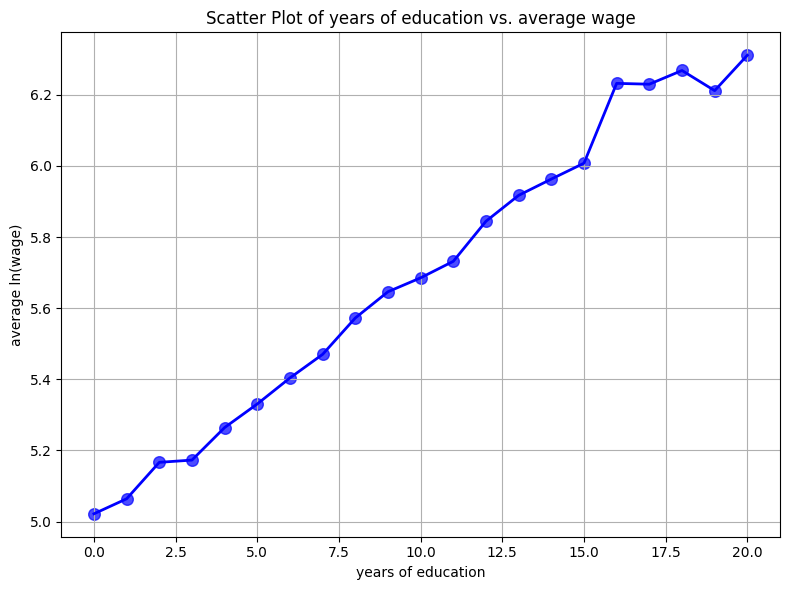

In [36]:
# Plotting for average ln(wage)
plt.figure(figsize=(8, 6))
plt.scatter(conditional['educ'], conditional['avg_ln_wage'], marker='o', color='b', alpha=0.7, s=70)
plt.plot(conditional['educ'], conditional['avg_ln_wage'], linestyle='-', color='b', linewidth=2)

# Labeling
plt.xlabel('years of education')
plt.ylabel('average ln(wage)')
plt.title('Scatter Plot of years of education vs. average wage')

# Showing the plot
plt.grid(True)
plt.tight_layout()
plt.show()

(g) Consider that now, instead of focusing on conditional sample means, we focussed on conditional sample medians. Calculate the conditional medians, and create a new plot including both, the function joining with a straight line the conditional sample medians together with the function joining conditional sample means. Include the plot in your answer. Comment.

In [28]:
# Grouping by 'educ' and calculating the median ln(wage) for each group
conditional_median = df.groupby('educ')['lwklywge'].median().reset_index()
conditional_median.columns = ['educ', 'med_ln_wage']
conditional_median.head()

,educ,med_ln_wage
0,0,5.217492
1,1,5.208330
2,2,5.259856
3,3,5.259597
4,4,5.354861


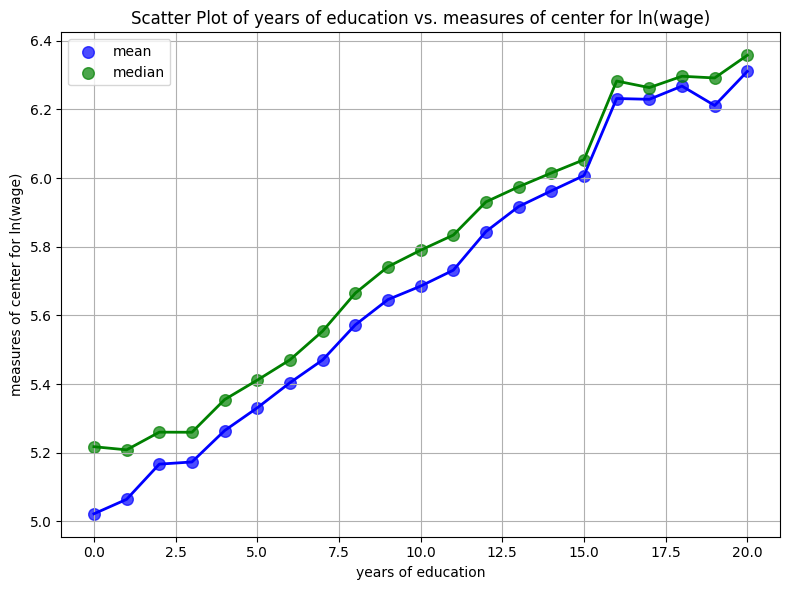

In [40]:
# Plotting for average ln(wage)
plt.figure(figsize=(8, 6))
plt.scatter(conditional['educ'], conditional['avg_ln_wage'], marker='o', color='b', alpha=0.7, label='mean', s=70)
plt.plot(conditional['educ'], conditional['avg_ln_wage'], linestyle='-', color='b', linewidth=2)

# Plotting median ln(wage)
plt.scatter(conditional_median['educ'], conditional_median['med_ln_wage'], marker='o', color='g', alpha=0.7, label='median', s=70)
plt.plot(conditional_median['educ'], conditional_median['med_ln_wage'], linestyle='-', color='g', linewidth=2)

# Labeling
plt.xlabel('years of education')
plt.ylabel('measures of center for ln(wage)')
plt.title('Scatter Plot of years of education vs. measures of center for ln(wage)')

# Showing the plot
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

We observe on the graph that ln(wage) is significantly positively correlated with the number of years of additional education. Therefore, additional years of education are, on average, associated with higher wages.

In the distributions of wages, conditioned on the number of additional years of education, the conditional sample means are lower than the medians. Thus, we may assume that the conditional distributions are negatively skewed (as indicated by the coefficient of skewness, which is -2, as checked in exercise b).

The plot illustrates that as the number of years of additional education increases, the conditional sample median and mean converge, and the conditional wage distributions over additional years of education become more symmetrical.